In [1]:
%cd ..

/Users/larremoreadmin/Library/CloudStorage/OneDrive-UCB-O365/classes/Infectious Diseases


In [34]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

from dynamics import *
from sir_models import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1.

In [42]:
x0 = np.array([999, 1, 0])
params = {
    'mu_birth': 0.01,
    'mu_death': 0.005,
    'beta': 1,
    'gamma': 0.5
}
sir_birth_death_results, t = forward_euler(sir_birth_death, params, x0, 1, 83)

In [16]:
sir_birth_death_results[:, -1].sum() 

1505.2792119819765

In [12]:
np.log(1.5) / np.log(1.005)

81.29558565292038

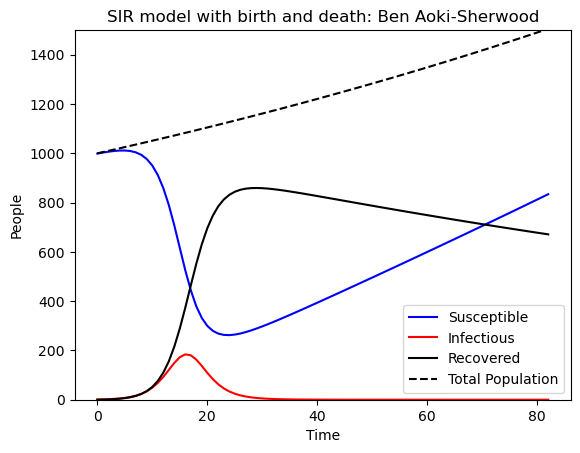

In [43]:
plt.plot(t, sir_birth_death_results[0, :], label='Susceptible', color="b")
plt.plot(t, sir_birth_death_results[1, :], label='Infectious', color="r")
plt.plot(t, sir_birth_death_results[2, :], label='Recovered', color="k")
plt.plot(t, sir_birth_death_results.sum(axis=0), "k--", label="Total Population")
plt.legend(loc="lower right")
plt.ylim(0, 1500)
plt.xlabel("Time")
plt.ylabel("People")
plt.title("SIR model with birth and death: Ben Aoki-Sherwood")
plt.savefig("hw1/plots/sir_birth_death.png")

# 3.

<>:11: SyntaxWarning: invalid escape sequence '\i'
<>:12: SyntaxWarning: invalid escape sequence '\i'
<>:15: SyntaxWarning: invalid escape sequence '\i'
<>:16: SyntaxWarning: invalid escape sequence '\i'
<>:11: SyntaxWarning: invalid escape sequence '\i'
<>:12: SyntaxWarning: invalid escape sequence '\i'
<>:15: SyntaxWarning: invalid escape sequence '\i'
<>:16: SyntaxWarning: invalid escape sequence '\i'
/var/folders/y_/2bb9t7kj1ql5pvbqf85sggh40000gs/T/ipykernel_62107/25223240.py:11: SyntaxWarning: invalid escape sequence '\i'
  axs[i].plot(x, f(x), label="$f(r_\infty)$", color="k")
/var/folders/y_/2bb9t7kj1ql5pvbqf85sggh40000gs/T/ipykernel_62107/25223240.py:12: SyntaxWarning: invalid escape sequence '\i'
  axs[i].plot(x, g(x, R_0[i]), label="$g(r_\infty)$", color="r")
/var/folders/y_/2bb9t7kj1ql5pvbqf85sggh40000gs/T/ipykernel_62107/25223240.py:15: SyntaxWarning: invalid escape sequence '\i'
  axs[i].set_xlabel("$r_\infty$")
/var/folders/y_/2bb9t7kj1ql5pvbqf85sggh40000gs/T/ipykernel_62

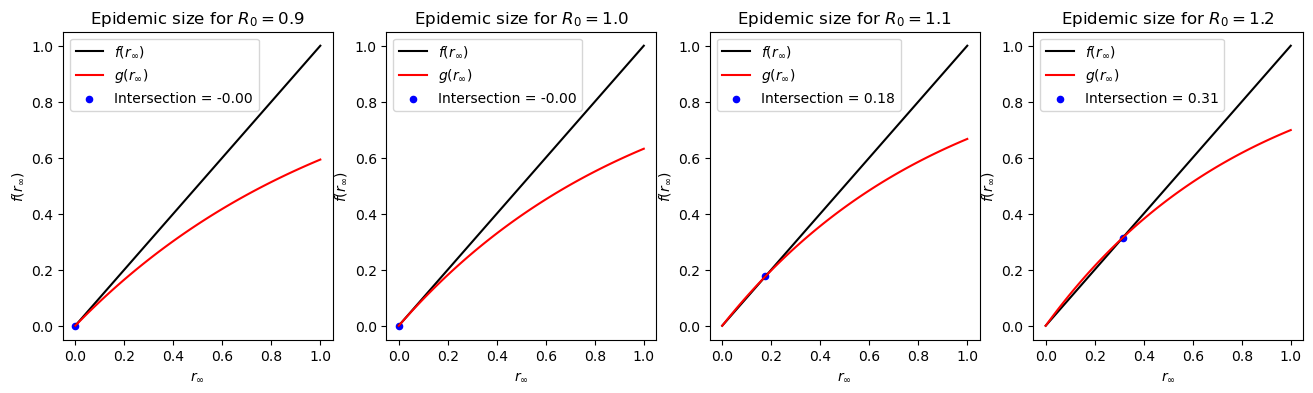

In [31]:
def f(x):
    return x
def g(x, R_0):
    return 1 - np.exp(-R_0 * x)

R_0 = [0.9, 1.0, 1.1, 1.2]
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
x = np.linspace(0, 1, 100)
for i in range(len(R_0)):
    sol = fsolve(lambda x: f(x) - g(x, R_0[i]), 0.5)[0]
    axs[i].plot(x, f(x), label="$f(r_\infty)$", color="k")
    axs[i].plot(x, g(x, R_0[i]), label="$g(r_\infty)$", color="r")
    axs[i].scatter(sol, sol, color="b", label=f"Intersection = {sol:.2f}", s=20)
    axs[i].set_title(f"Epidemic size for $R_0 = {R_0[i]}$")
    axs[i].set_xlabel("$r_\infty$")
    axs[i].set_ylabel("$f(r_\infty)$")
    axs[i].legend()
plt.savefig("hw1/plots/sir_final_size.png")

In [36]:
r_0 = 2
r_inf = fsolve(lambda x: f(x) - g(x, r_0), 0.5)[0]
print(r_inf)

0.7968121300200012


In [51]:
x0 = np.array([999, 1, 0])
params = {
    'beta': 1,
    'gamma': 0.5
}
sir_results, t_sir = forward_euler(sir, params, x0, 0.1, 1000)

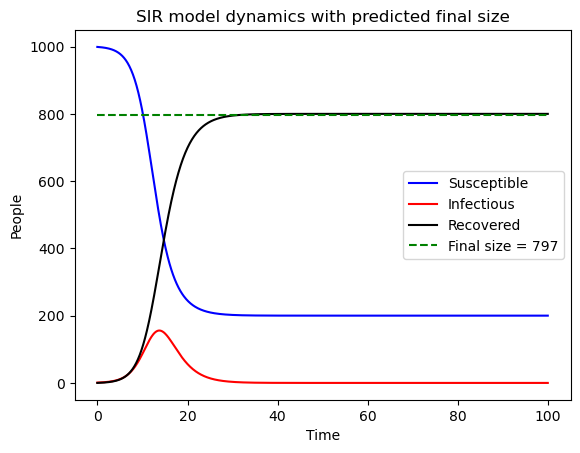

In [68]:
plt.plot(t_sir, sir_results[0, :], label='Susceptible', color="b")
plt.plot(t_sir, sir_results[1, :], label='Infectious', color="r")
plt.plot(t_sir, sir_results[2, :], label='Recovered', color="k")
plt.hlines(r_inf * 1000, 0, 100, colors="g", linestyles="dashed", label=f"Final size = {r_inf*1000:.0f}")
plt.legend(loc="center right")
plt.xlabel("Time")
plt.ylabel("People")
plt.title("SIR model dynamics with predicted final size")
plt.savefig("hw1/plots/sir_epidemic_size_test.png")

In [53]:
sir_results[2, -1]

799.9630661879436

# 4.

In [ ]:
x0 = np.array(0.5, 1, 0])
params = {
    'beta': 1,
    'gamma': 0.5
}
sir_results, t_sir = forward_euler(sir, params, x0, 0.1, 1000)
plt.plot(t_sir, sir_results[0, :], label='Susceptible', color="b")
plt.plot(t_sir, sir_results[1, :], label='Infectious', color="r")
plt.plot(t_sir, sir_results[2, :], label='Recovered', color="k")
plt.hlines(r_inf * 1000, 0, 100, colors="g", linestyles="dashed", label=f"Final size = {r_inf*1000:.0f}")
plt.legend(loc="center right")
plt.xlabel("Time")
plt.ylabel("People")

In [58]:
r_0 = 2
s = np.linspace(0, 1, 101)[1:-1]

<>:18: SyntaxWarning: invalid escape sequence '\i'
<>:18: SyntaxWarning: invalid escape sequence '\i'
/var/folders/y_/2bb9t7kj1ql5pvbqf85sggh40000gs/T/ipykernel_62107/1737093662.py:18: SyntaxWarning: invalid escape sequence '\i'
  plt.ylabel("Perturbed susceptible fraction $s(\infty)$")


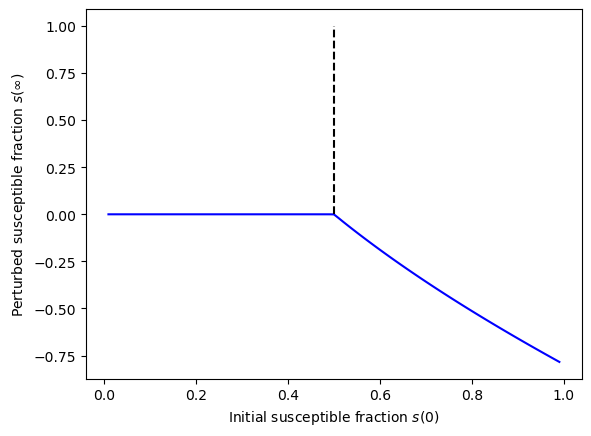

In [ ]:
n = 1e6
epsilon = 1
final_sizes = []
for s_eq in s:
    x0 = np.array([s_eq * (n - epsilon), epsilon, n - s_eq * (n - epsilon) - epsilon])
    params = {
        'beta': 1,
        'gamma': 0.5
    }
    results, t = forward_euler(sir, params, x0, 0.01, 100000)
    final_sizes.append(results[0, -1] / n)

final_sizes = np.array(final_sizes)
delta_s  = final_sizes - s

<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:3: SyntaxWarning: invalid escape sequence '\i'
<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:3: SyntaxWarning: invalid escape sequence '\i'
/var/folders/y_/2bb9t7kj1ql5pvbqf85sggh40000gs/T/ipykernel_62107/1174386232.py:1: SyntaxWarning: invalid escape sequence '\i'
  plt.plot(s, delta_s, color="b", label="$s(0) - s(\infty)$")
/var/folders/y_/2bb9t7kj1ql5pvbqf85sggh40000gs/T/ipykernel_62107/1174386232.py:3: SyntaxWarning: invalid escape sequence '\i'
  plt.ylabel("Difference in final perturbed susceptible fraction\n and equilibrium susceptible fraction, $s(0) - s(\infty)$")


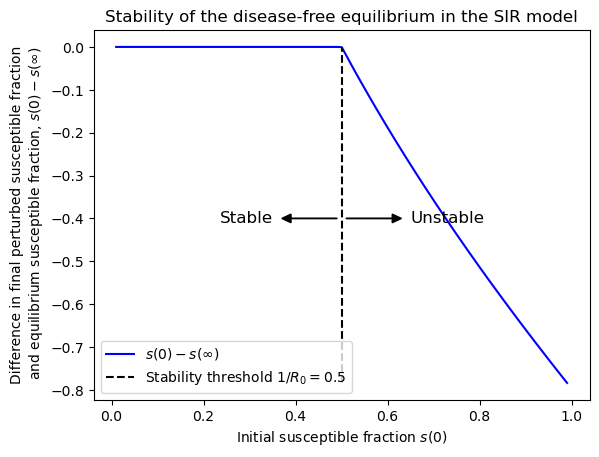

In [88]:
plt.plot(s, delta_s, color="b", label="$s(0) - s(\infty)$")
plt.xlabel("Initial susceptible fraction $s(0)$")
plt.ylabel("Difference in final perturbed susceptible fraction\n and equilibrium susceptible fraction, $s(0) - s(\infty)$")
plt.vlines(1 / r_0, min(delta_s), max(delta_s), colors="k", linestyles="dashed", label=f"Stability threshold $1/R_0 = {1/r_0}$")
# add arrows for stable and unstable regions
plt.arrow(0.49, -0.4, -0.1, 0, head_width=0.02, head_length=0.02, fc='k', ec='k')
plt.text(0.35, -0.4, "Stable", fontsize=12, ha="right", va="center")
plt.arrow(0.51, -0.4, 0.1, 0, head_width=0.02, head_length=0.02, fc='k', ec='k')
plt.text(0.65, -0.4, "Unstable", fontsize=12, ha="left", va="center")
plt.title("Stability of the disease-free equilibrium in the SIR model")
plt.legend()
plt.savefig("hw1/plots/sir_stability.png")